<h1 style="color:#8B66FF;">Question 2</h1>
<h2 style="color:#659FFF;">Multiresolutional Blending and Feathering</h2>
This algorithm is used for combining two images using blending and lpalacian stacks of them.

We start by reading the images and then construct their laplacian stack (for some number of iterations). To do this, I used
get laplacian function which basically first blurs the image using a window in size of k and sigma = 20. Then by
subtracting the blurred image from the original one, we get the laplacian. It then returns both the blurred image and the laplacian in that stage.
We do this for several time(number of iterations) for both images. Every time append the result to the corresponding stack.
<br>
Then in the last step append the blurred images to stacks. Next, we start from the top of the stack where is it the blurred images in the last iteration.
Apply the feathering to them with a high value for the window size when blurring the mask. This way we have obtained the general parts of the combination of those two.
We continue by adding the details using the laplacian images from stack and a lower window size for mask. Gradually, we can see the details obtained in each step.

In [19]:
import cv2


def apply_blending(src_name, tar_name, mask_name, iter_num=7, blur_window=7, window_size_low=7, window_size_high=19):
    img_1 = cv2.imread("../images/" + src_name + ".jpg").astype(float)
    print(" image1 :")
    plt.imshow(cv2.cvtColor(img_1.astype('uint8'), cv2.COLOR_BGR2RGB))
    plt.show()
    img_2 = cv2.imread("../images/" + tar_name + ".jpg").astype(float)
    print(" image2 :")
    plt.imshow(cv2.cvtColor(img_2.astype('uint8'), cv2.COLOR_BGR2RGB))
    plt.show()
    mask = cv2.imread("../images/" + mask_name + ".jpg") / 255
    print("mask image :")
    plt.imshow(cv2.cvtColor((mask * 255).astype('uint8'), cv2.COLOR_BGR2RGB))
    plt.show()
    stack1, stack2 = [], [] # build the stacks for these two images.
    for iteration in range(iter_num):
        img_1, lap1 = get_laplacian(blur_window, img_1)
        img_2, lap2 = get_laplacian(blur_window, img_2)
        stack1.append(lap1), stack2.append(lap2)

    stack1.append(img_1), stack2.append(img_2)
    res = apply_feathering(stack1[iter_num], stack2[iter_num], mask, window_size_high)

    for iteration in range(iter_num - 1, -1, -1):
        res += apply_feathering(stack1[iteration], stack2[iteration], mask, window_size_low)

    cv2.imwrite("../results/res10.jpg", scale(res))
    return scale(res)


In [20]:
# laplacian stack:
def get_laplacian(k, img):
    blur = cv2.GaussianBlur(img, (k, k), 20)
    laplacian = img - blur
    return blur, laplacian


def apply_feathering(src, tar, maskk, k):
    maskk = cv2.GaussianBlur(maskk, (k, k), 20) # blur the mask
    return tar * maskk + src * (1 - maskk) # apply it on images


def scale(array):
    min, max = array.min(), array.max()
    return ((array - min) * (1 / (max - min) * 255)).astype('uint8')

Now let's apply this to some images:

 image1 :


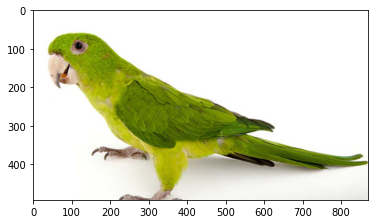

 image2 :


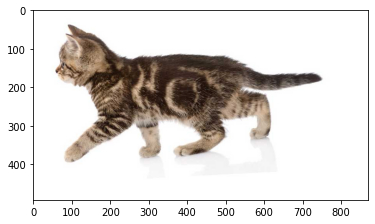

mask image :


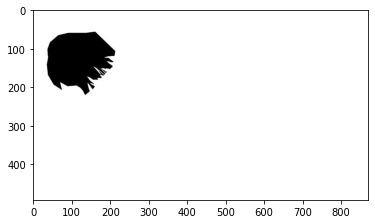

the result


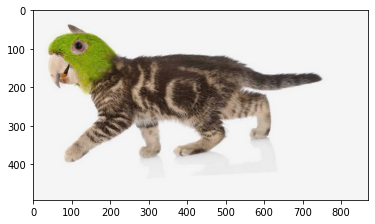

In [21]:
from matplotlib import pyplot as plt

img = apply_blending("res08", "res09", "cat_bird_mask")
print("the result")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

 image1 :


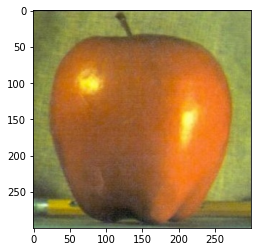

 image2 :


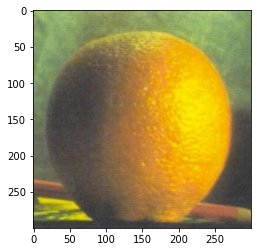

mask image :


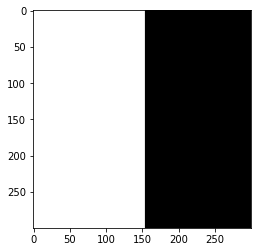

the result


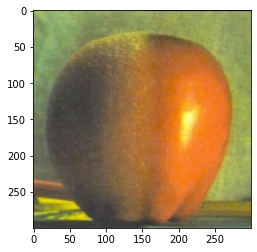

In [24]:
img = apply_blending("apple", "orange", "mask_oraple", iter_num=10, blur_window=17, window_size_low=19, window_size_high=41)
print("the result")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()